In [1]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Firstly, we'll train a Decision Tree Classifier and gauge its accuracy on the wine dataset.


In [2]:
wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [3]:
# Accuracy calculated as ratio
compare = [i  for i,j in zip(clf.predict(X_test), y_test) if i == j]
accuracy = len(compare) / len(y_test)
print(f'Accuracy is: {accuracy}')

Accuracy is: 0.9629629629629629


In [8]:
# And using sklearn's score
acc = clf.score(X_test, y_test)
print(f"Accuracy is: {acc}")

Accuracy is: 0.9629629629629629


In [6]:
accuracy == acc

True

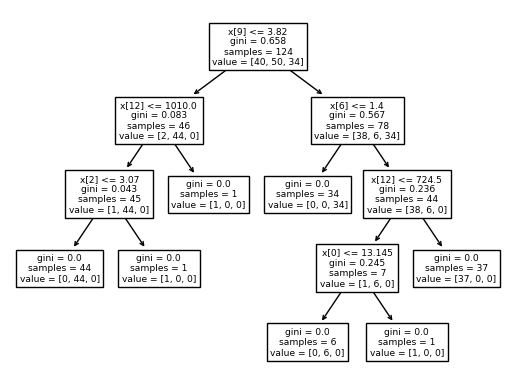

In [7]:
tree.plot_tree(clf)
plt.show()

Next on, we experiment with the various parameters of the classifier in an attempt to achieve better accuracy. To that end, we've chosen the criterion, max depth, min samples before split, and min samples per leaf parameters.

In [7]:
'''
The function below will create tuples indicating the various parameters levels. 
The tuples will be used to create a multi-index dataframe, 
which we'll use for plotting. 
The function will notify us if we manage to get an increase in accuracy.
'''

def classifier(criterion,x,y,xv,yv):
    if criterion == 'gini':
        global d_g
        d_g = {}
        for i in range(1,6):
            for j in range(2,6):
                for k in range(1,6):
                    clf = DecisionTreeClassifier(criterion='gini',
                                                 max_depth=i,
                                                 min_samples_split=j,
                                                 min_samples_leaf=k,
                                                 random_state=0)
                    clf.fit(x,y)
                    accu = clf.score(xv,yv)
                    d_g[(i,j,k)] = accu
                    if accu > acc:
                        print(f'Higher accuracy has been achieved at max depth ({i}),'
                              f'min_samples_split ({j}),'
                              f'min_samples_leaf ({k}): {accu}')
        return d_g
                    
    if criterion == 'entropy':
        global d_e
        d_e = {}
        for i in range(1,6):
            for j in range(2,6):
                for k in range(1,6):
                    clf = DecisionTreeClassifier(criterion='entropy',
                                                 max_depth=i,
                                                 min_samples_split=j,
                                                 min_samples_leaf=k,
                                                 random_state=0)
                    clf.fit(x,y)
                    accu = clf.score(xv,yv)
                    d_e[(i,j,k)] = accu
                    if accu > acc:
                        print(f'Higher accuracy has been achieved at max depth ({i}),'
                              f'min_samples_split ({j}),'
                              f'min_samples_leaf ({k}): {accu}')
        return d_e

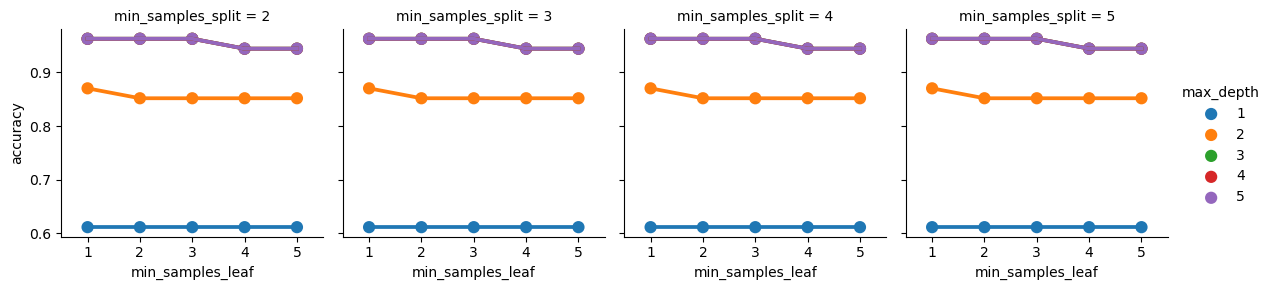

In [8]:
#First we investigate based on gini splitting
classifier('gini',X_train,y_train,X_test,y_test)
m1 = pd.DataFrame.from_dict(d_g, orient='index',columns=['accuracy'])
mi1 = pd.MultiIndex.from_tuples(d_g)
df1 = pd.DataFrame(m1,index=mi1).reset_index()
df1.rename(columns={'level_0':'max_depth','level_1':'min_samples_split',
                    'level_2':'min_samples_leaf'}, inplace=True)
g = sns.FacetGrid(data=df1, col='min_samples_split', hue='max_depth')
g.map(sns.pointplot, 'min_samples_leaf','accuracy',order=[1,2,3,4,5],)
g.add_legend()
plt.show()

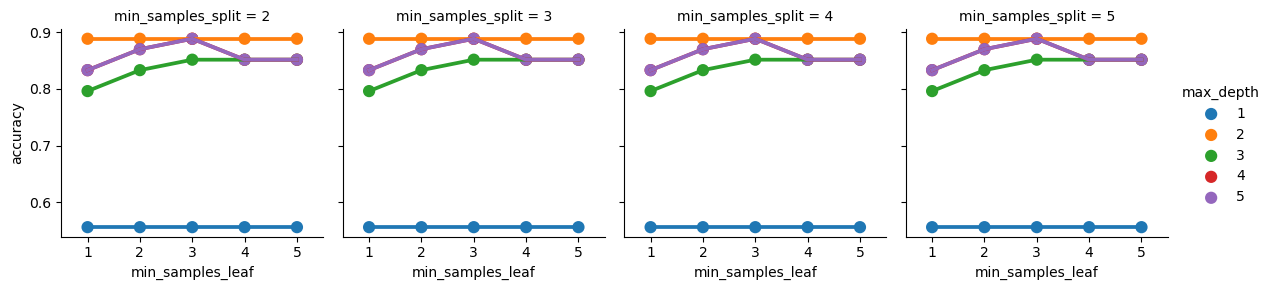

In [9]:
#Next, using entropy
classifier('entropy',X_train,y_train,X_test,y_test)
m2 = pd.DataFrame.from_dict(d_e, orient='index',columns=['accuracy'])
mi2 = pd.MultiIndex.from_tuples(d_e)
df2 = pd.DataFrame(m2,index=mi2).reset_index()
df2.rename(columns={'level_0':'max_depth','level_1':'min_samples_split',
                    'level_2':'min_samples_leaf'}, inplace=True)
g = sns.FacetGrid(data=df2, col='min_samples_split', hue='max_depth')
g.map(sns.pointplot, 'min_samples_leaf','accuracy',order=[1,2,3,4,5])
g.add_legend()
plt.show()

It appears that by manipulating those parameters, we cannot get an increase over the 96% accuracy level. That level was already quite high, and a classifier would find it hard to get over that against unseen data.

However, there are a few other conclusions we can reach based on the information above. Firstly, it appears that splitting using Gini yields a better overall accuracy. In both cases, varying the minimum samples before split does not seem to have a significant effect. 

In the case of Gini, we seem to have best, and comparable results, at depth levels 3,4, and 5, while we notice significant drops after that. Interestingly, having more than 3 samples per leaf seems to lead to decrease in accuracy. 

Regarding entropy-based splitting, it can be seen that the best and steady results appear at max depth of 2. Of note is the trend that appears at max depth level of 5, where we see an increase in accuracy as the minimum samples per leaf move towards 3, while a significant drop occurs after that.

## Iris Dataset

We will now perform the same classification task using the iris dataset

In [10]:
iris = load_iris()

Xi_train, Xi_test, yi_train, yi_test = train_test_split(iris.data, iris.target, 
                                                        test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(Xi_train, yi_train)
acc = clf.score(Xi_test, yi_test)
print(acc)

0.9777777777777777


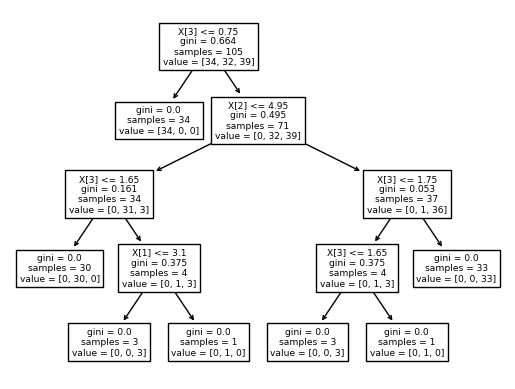

In [11]:
tree.plot_tree(clf)
plt.show()

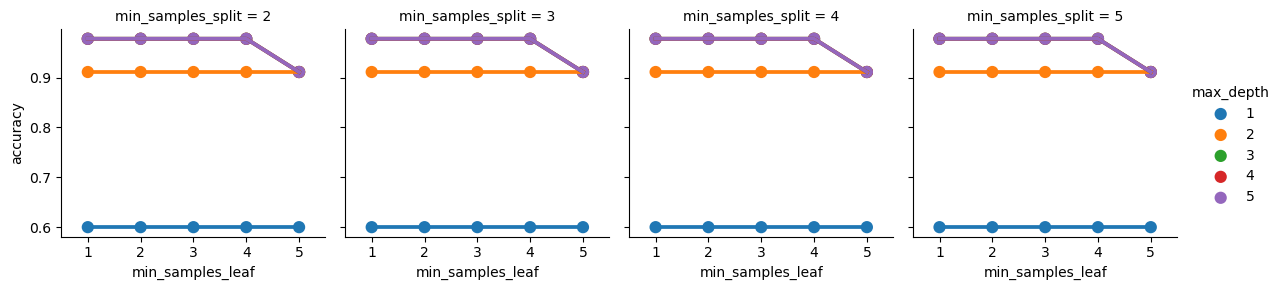

In [12]:
classifier('gini',Xi_train,yi_train,Xi_test,yi_test)
m3 = pd.DataFrame.from_dict(d_g, orient='index',columns=['accuracy'])
mi3 = pd.MultiIndex.from_tuples(d_g)
df3 = pd.DataFrame(m3,index=mi3).reset_index()
df3.rename(columns={'level_0':'max_depth','level_1':'min_samples_split',
                    'level_2':'min_samples_leaf'}, inplace=True)
g = sns.FacetGrid(data=df3, col='min_samples_split', hue='max_depth')
g.map(sns.pointplot, 'min_samples_leaf','accuracy',order=[1,2,3,4,5],)
g.add_legend()
plt.show()

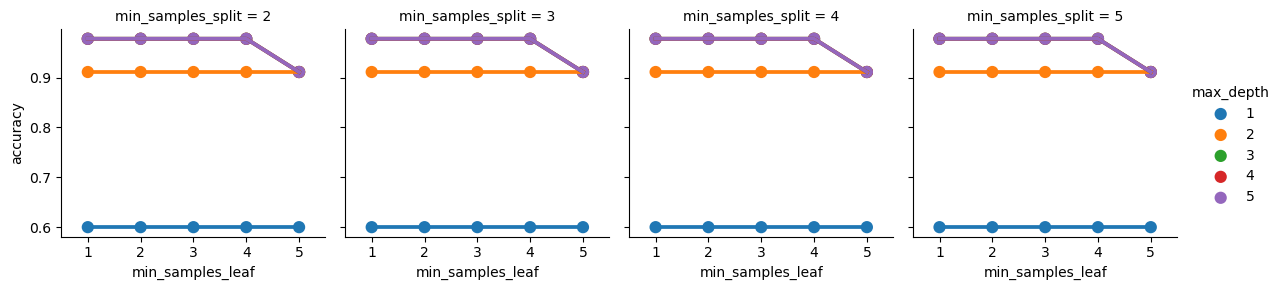

In [13]:
classifier('entropy',Xi_train,yi_train,Xi_test,yi_test)
m4 = pd.DataFrame.from_dict(d_e, orient='index',columns=['accuracy'])
mi4 = pd.MultiIndex.from_tuples(d_e)
df4 = pd.DataFrame(m4,index=mi4).reset_index()
df4.rename(columns={'level_0':'max_depth','level_1':'min_samples_split',
                    'level_2':'min_samples_leaf'}, inplace=True)
g = sns.FacetGrid(data=df4, col='min_samples_split', hue='max_depth')
g.map(sns.pointplot, 'min_samples_leaf','accuracy',order=[1,2,3,4,5],)
g.add_legend()
plt.show()

In [14]:
classifier('gini',Xi_train,yi_train,
           Xi_test,yi_test) == classifier('entropy',Xi_train,yi_train,
                                          Xi_test,yi_test)


True

In this case we seem to have the same results regardless of the way we split. The only noteworthy part is a drop at max depth level 5 when we move from 4 to 5 min samples per leaf. The accuracy level of 97.7% does not seem possible to be improved upon.